# Homework 4. Frequent Words and Web scraping

***Double Click here to edit this cell***

- Name: 임태호
- Student ID: 201903021
- Submission date: 2023.05.19

## Problem 1 (15 pts)

- Project Gutenberg is a volunteer effort to digitize and archive cultural works.
- Moby-Dick is an 1851 novel by American writer Herman Melville.
- You can find Moby-Dick in an ordinary text format at https://www.gutenberg.org/files/2701/old/moby10b.txt
- Use **requests** module to get the text.


- We want to compute word frequency of words appearing in mobydick and generate WordCloud
    - First, you must split the text into words. 
    - **Any symbols(!, ., ?, ,, +, -, *, ...)** are delimeters
    - Numbers should not be words. 
    - Null string is not a word. 
    - Any delimiters should not be words.
    - To split into words, use **re** (regular expression module)
    - (Upper or lower) Cases does not matter in words

### 1.1 Print top 50 most common words (5 pts)

In [1]:
# YOUR CODE MUST BE HERE
import re
import requests
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

url = 'https://www.gutenberg.org/files/2701/old/moby10b.txt'
response = requests.get(url)
text = response.text

# Split text into words
words = re.findall(r'\b[a-zA-Z]+\b', text)

# Count word frequencies
word_freq = Counter(map(str.lower, words))

# Print 50 most common words
print(word_freq.most_common(50))

[('the', 14512), ('of', 6676), ('and', 6471), ('a', 4774), ('to', 4690), ('in', 4190), ('that', 3095), ('it', 2542), ('his', 2530), ('i', 2128), ('he', 1896), ('but', 1823), ('s', 1811), ('as', 1750), ('is', 1748), ('with', 1729), ('was', 1647), ('for', 1643), ('all', 1537), ('this', 1437), ('at', 1332), ('by', 1232), ('whale', 1228), ('not', 1162), ('from', 1103), ('on', 1077), ('so', 1073), ('him', 1067), ('be', 1058), ('you', 949), ('one', 934), ('there', 870), ('now', 787), ('had', 779), ('have', 773), ('or', 761), ('were', 685), ('they', 669), ('which', 650), ('like', 648), ('me', 634), ('then', 632), ('some', 621), ('what', 620), ('their', 620), ('are', 611), ('when', 608), ('an', 600), ('no', 592), ('my', 589)]


 **Your output should be like the following**:
 ```python
[('the', 14512), ('of', 6676), ('and', 6471), ('a', 4774), ('to', 4690), ('in', 4190), ('that', 3095), ('it', 2542), ('his', 2530), ('i', 2128), ('he', 1896), ('but', 1823), ('s', 1811), ('as', 1750), ('is', 1748), ('with', 1729), ('was', 1647), ('for', 1643), ('all', 1537), ('this', 1437), ('at', 1332), ('by', 1232), ('whale', 1228), ('not', 1162), ('from', 1103), ('on', 1077), ('so', 1073), ('him', 1067), ('be', 1058), ('you', 949), ('one', 934), ('there', 870), ('now', 787), ('had', 779), ('have', 773), ('or', 761), ('were', 685), ('they', 669), ('which', 650), ('like', 648), ('me', 634), ('then', 632), ('some', 621), ('what', 620), ('their', 620), ('are', 611), ('when', 608), ('an', 600), ('no', 592), ('my', 589)]
```

### 1.2 Plot word frequency (5 pts)

- Sort the word frequency in descending order
- Plot the word frequency
- Plot the word frequency in log-log plot.

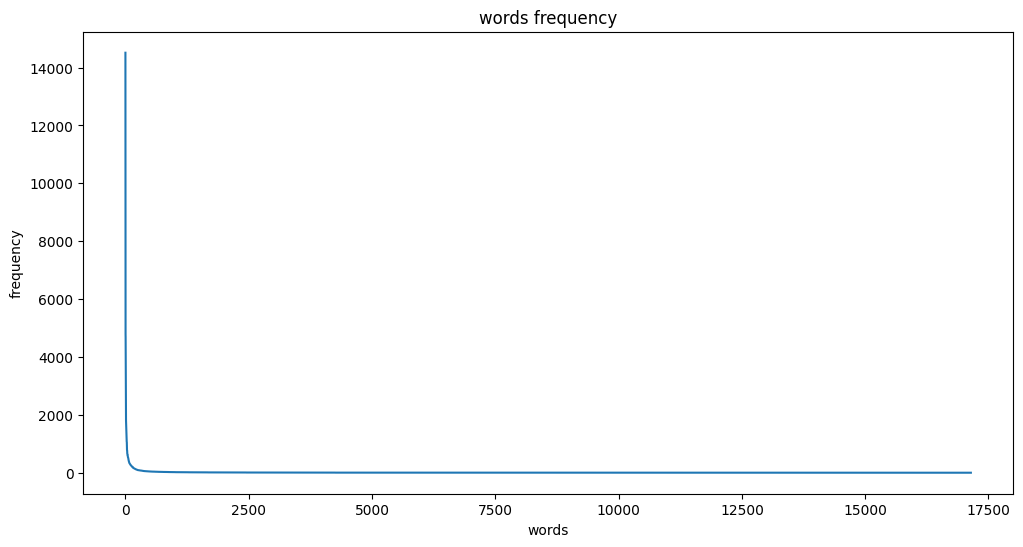

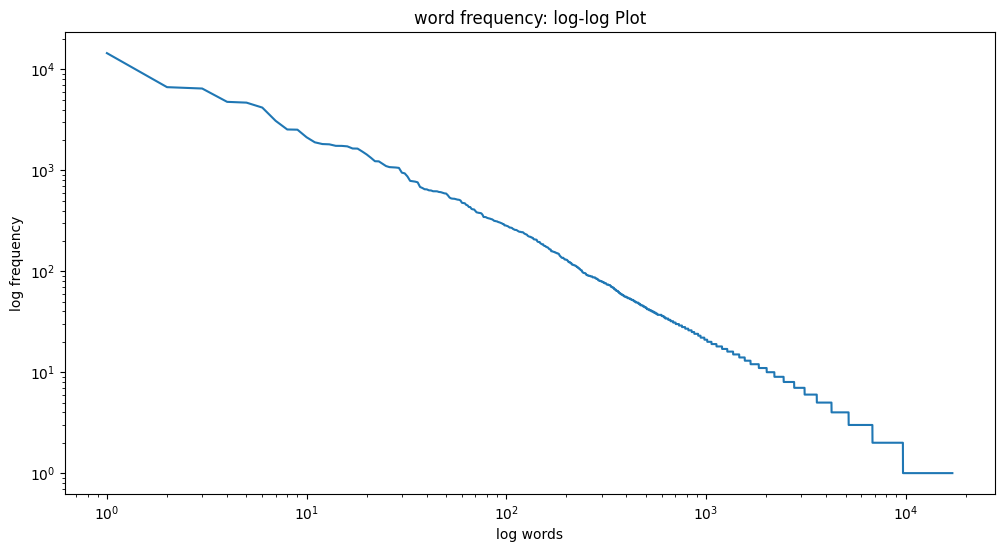

In [2]:
# YOUR CODE MUST BE HERE
import re
import requests
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import math

url = 'https://www.gutenberg.org/files/2701/old/moby10b.txt'
response = requests.get(url)
text = response.text

words = re.findall(r'\b[a-zA-Z]+\b', text)

word_freq = Counter(map(str.lower, words))

sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)


x_log = [i+1 for i in range(len(sorted_word_freq))]
y_log = [word[1] for word in sorted_word_freq]

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_log, y_log)
ax.set_title('words frequency')
ax.set_xlabel('words')
ax.set_ylabel('frequency')
plt.show()

fig, ax = plt.subplots(figsize=(12,6))
ax.loglog(x_log, y_log)
ax.set_title('word frequency: log-log Plot')
ax.set_xlabel('log words')
ax.set_ylabel('log frequency')

plt.show()


**Your output should be like**:
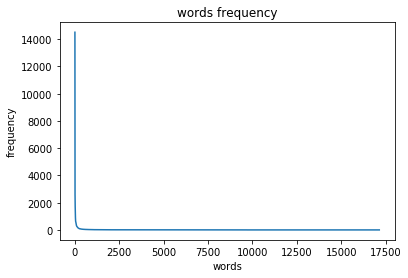



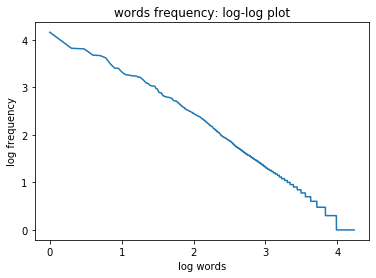

### Discussion

- Read this wikipedia article : https://ko.wikipedia.org/wiki/%EC%A7%80%ED%94%84%EC%9D%98_%EB%B2%95%EC%B9%99)
- Discuss what you learned from the distribution.


```
지프의 법칙은 자연어나 다른 종류의 데이터셋에서 발견되는 통계적인 현상을 설명하는 법칙이다.

데이터셋 내에서 등장하는 단어나 항목들의 빈도와 등수(랭크)사이에 일정한 관계가 있다는 것이 법칙의 골자이다.

빈도가 높은 단어나 항목은 다른 단어나 항목대비 낮은 랭크를 가지고, 반대는 높은 랭크를 가진다.

그래서 일반적으로 f = k / r이라는 식으로 위 관계가 표현되며, f = 빈도, r = 랭크, k = 상수를 의미한다.

지프의 법칙은 자연어 처리, 정보 검색, 데이터 압축 등 다양한 분야에서 응용된다.
```


### 1.3 Word Cloud (5 pts)

- Print top 10 most words except stop words
- Draw word cloud of top 10 most common words
- Googling for how to draw word clouds

**Your output should be like**:
```python
[('whale', 1228), ('one', 934), ('like', 648), ('upon', 566), ('man', 527), ('ship', 518), ('ahab', 511), ('ye', 472), ('sea', 455), ('old', 450)]
```
**Your output should be like this (but NOT exactly the the same)**:
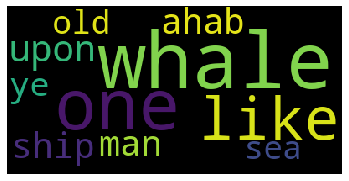

- The following is English stop words list

In [3]:
stopwords = {'it', 'than', 'out', 'an', 'at', 'until', 'wouldn', 'too', 'each', 'off', 'whom', 'not', 'ain', 'weren', "you've", 'isn', 've', "that'll", 'didn', 'couldn', 'with', 'for', 'me', "shouldn't", 'those', 'once', 'them', 'him', 'again', 'what', 'to', 's', 'don', 'yourselves', "she's", 'd', 'we', 'so', 'does', 'your', 'is', 'such', 'hasn', 'doesn', "doesn't", 'no', 'll', 'their', 'before', 'my', 'being', 'and', 'but', 'below', 'won', "don't", 't', 'myself', 'very', 'why', "mustn't", 'that', 'been', 'you', "you'd", 'few', 'other', 'ma', 'any', 'having', 'against', 'into', 'on', 'just', 'herself', "hadn't", "mightn't", 'aren', "wouldn't", 'ours', 'about', 'then', 'mustn', 'i', 'y', 'should', 'all', 'while', 'himself', 'do', 'up', 'were', 'this', 'most', 'when', 'nor', 'from', 'hadn', 'theirs', 'she', 'be', 'under', 'or', 'will', 'through', 'our', "isn't", 'as', 'between', 'had', 'more', "aren't", "weren't", 'if', 'the', 'am', 'how', 'both', "you're", 'yourself', "couldn't", 'only', 'in', 'itself', 'own', "it's", 'because', 'some', "didn't", 'wasn', 'shan', "hasn't", 'mightn', 'shouldn', 'here', 'he', 'where', 'm', 're', 'was', 'after', 'has', 'same', "shan't", 'further', "wasn't", 'down', 'yours', "should've", 'now', "needn't", 'above', 'haven', 'its', 'who', 'of', 'ourselves', 'did', 'these', 'there', 'his', "haven't", "won't", 'themselves', "you'll", 'a', 'are', 'which', 'have', 'by', 'during', 'can', 'hers', 'over', 'her', 'doing', 'o', 'needn', 'they'}

[('whale', 1228), ('one', 934), ('like', 648), ('upon', 566), ('man', 527), ('ship', 518), ('ahab', 511), ('ye', 472), ('sea', 455), ('old', 450)]


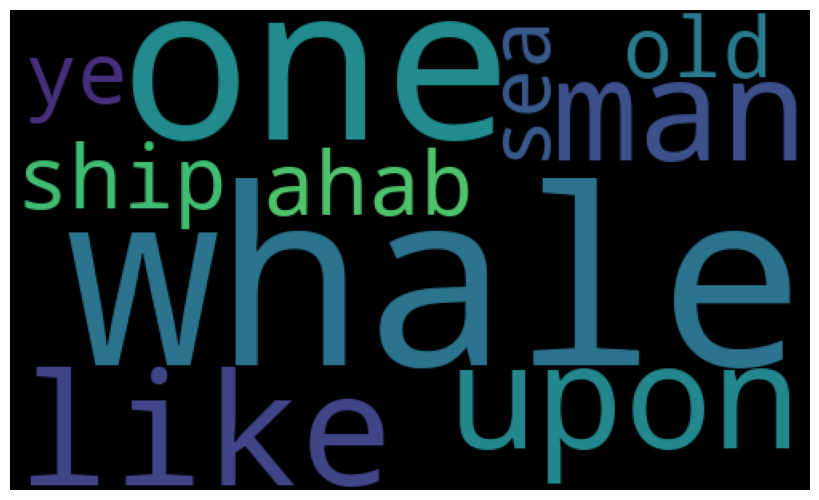

In [4]:
# YOUR CODE MUST BE HERE
import re
import requests
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Import stop words from nltk
# from nltk.corpus import stopwords
# nltk.download('stopwords')
# stop_words = set(stopwords.words('english'))

url = 'https://www.gutenberg.org/files/2701/old/moby10b.txt'
response = requests.get(url)
text = response.text

# Split text into words
words = re.findall(r'\b[a-zA-Z]+\b', text)

# Count word frequencies
word_freq = Counter(map(str.lower, words))

# Remove stop words from the word frequency list
for stop_word in stopwords:
    word_freq.pop(stop_word, None)

# Sort word frequency in descending order
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# Print top 10 most common words
top_10_words = sorted_word_freq[:10]
print(top_10_words)

# Draw word cloud of top 10 most common words
wordcloud = WordCloud(width = 500, height = 300,
                background_color ='black',
                min_font_size = 10).generate_from_frequencies(dict(top_10_words))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

## Problem 2 (20 pts)

- We want to find how many CS faculty members at CS department of Stanford Univ work on CS research areas.
- First, visit https://cs.stanford.edu/research
- Take a look at the source html of the web page.
- We want to scrape data on all the faculty members
- Run the following two cells and see what happens
- If necessary, install html5lib

In [5]:
from bs4 import BeautifulSoup
import requests

url = "https://cs.stanford.edu/research?items_per_page=All&field_faculty_status_value=active"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

# f = open("view-source.txt", "r")
# text = f.read()
# soup = BeautifulSoup(text, 'html5lib')

## Remark

- Stanford Univ에 너무 많이 접속해서 (DDOS처럼 여겨져서) 접속이 막힐 수도 있음
- 해당 웹페이지를 처음 접속해서 파일로 저장한 다음,
- 파일로 부터 읽어서 숙제를 테스트하는 게 필요함.




### 숙제 제출시 아래 cell은 절대 실행하지(출력에 포함하지) 말 것!!!

In [6]:
print(soup.tbody.prettify())

<tbody>
 <tr>
  <td class="views-field views-field-field-faculty-photo views-align-center border-simple">
   <a href="https://people.csail.mit.edu/sachour/" target="_blank">
    <img alt="" height="143" src="https://cs.stanford.edu/sites/default/files/styles/faculty_profile/public/me-v2.png?itok=Hxa6r4GE" typeof="foaf:Image" width="110"/>
   </a>
  </td>
  <td class="views-field views-field-title fac_prof_view_name">
   <a href="https://people.csail.mit.edu/sachour/" target="_blank">
    Sara Achour
   </a>
  </td>
  <td class="views-field views-field-field-faculty-title fac_prof_view_title">
   Assistant Professor
  </td>
  <td class="views-field views-field-field-research-focus fac_prof_view_focus">
   Computer Systems
  </td>
 </tr>
 <tr>
  <td class="views-field views-field-field-faculty-photo views-align-center border-simple">
   <a href="https://profiles.stanford.edu/maneesh-agrawala" target="_blank">
    <img alt="" height="158" src="https://cs.stanford.edu/sites/default/files/s

### Draw bar charts on research area contributions of Stanford CS faculty

- For each research area, we want to compute how many professors works on that area.
- If one professor works on n research fields, the contribution to one research field is 1/n.
- The colors for professor ranks (assistant, associate, full professors) may be your own choice.
- Your output should be like:

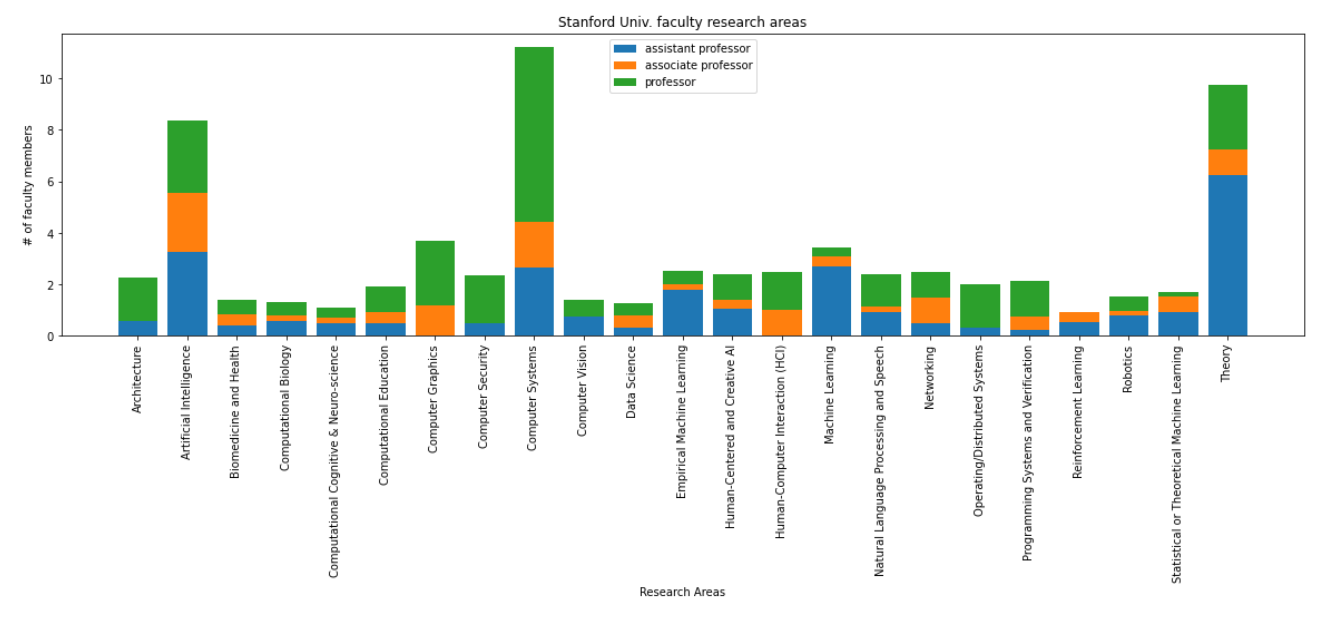

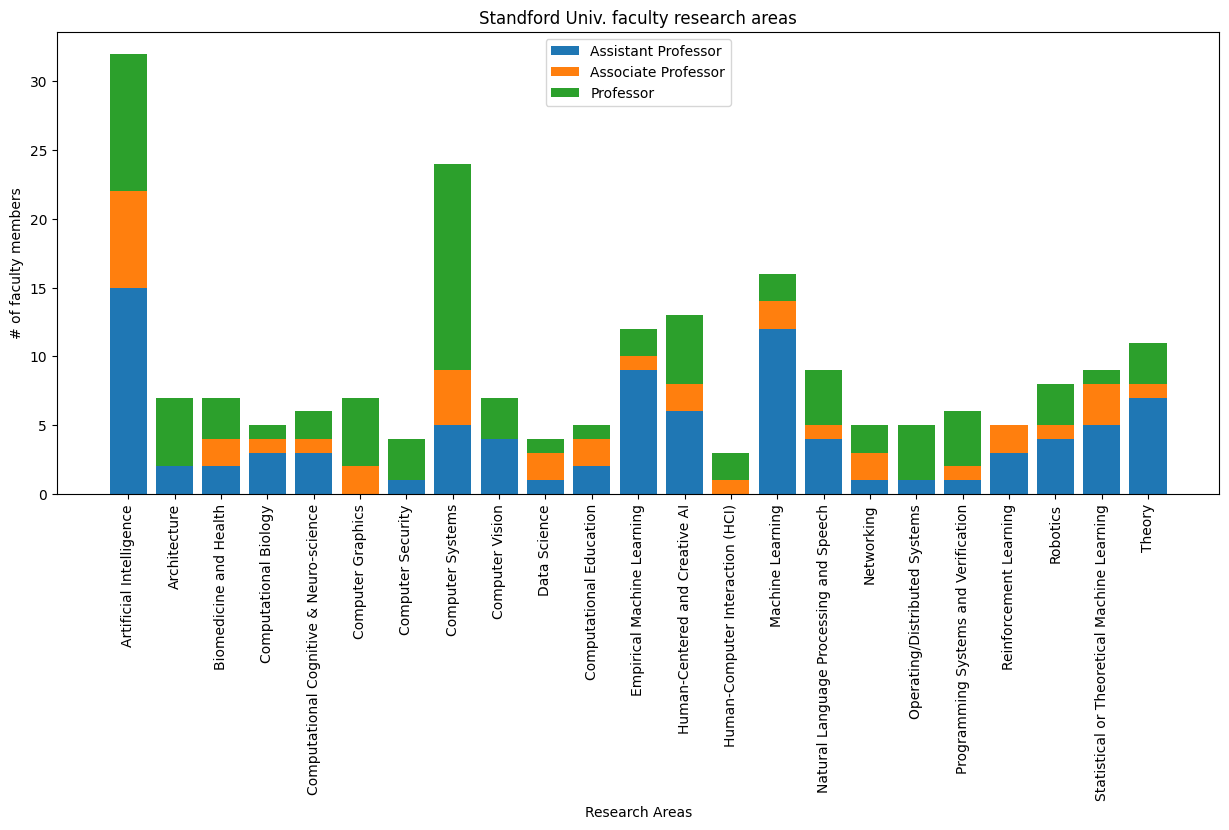

In [7]:
import matplotlib.pyplot as plt
from collections import defaultdict
from bs4 import BeautifulSoup

#교수 데이터 가져오기(직책, 소속 분야)
research_area_options = soup.select("#edit-field-research-focus-value option")
research_area_mapping = {option["value"]:
                         option.text for option in research_area_options
                         if option["value"] != "All"}

professor_ranks = ['Assistant Professor', 'Associate Professor', 'Professor']

research_areas = defaultdict(lambda: {rank: 0 for rank in professor_ranks})

for row in soup.select('tbody tr'):
    areas = row.select_one('.fac_prof_view_focus')
    
    if areas:
        areas = areas.get_text("\n", strip=True).split('\n')
        areas = [area.strip() for area in areas if area.strip()]  # 공백 필터링
    else:
        continue
    
    rank = row.select_one('.fac_prof_view_title')
    if rank:
        rank = rank.text.strip()
    else:
        continue

    if rank not in professor_ranks:
        continue

    for area in areas:
        research_areas[area][rank] += 1

# 차트 그리기
research_areas_keys = [research_area_mapping[key] for key
                       in research_area_mapping.keys()]
bar_data = {rank:
            [research_areas[key][rank] for key 
             in research_areas_keys] for rank in professor_ranks}
bar_width = 0.8
x_positions = list(range(len(research_area_mapping)))

plt.figure(figsize=(15, 6))

bottom = [0] * len(research_area_mapping)

for rank in professor_ranks:
    plt.bar(x_positions,
            bar_data[rank],
            width=bar_width,
            bottom=bottom,
            label=rank)
    bottom = [bottom[i] 
              + bar_data[rank][i]
              for i in range(len(research_area_mapping))]

plt.title("Standford Univ. faculty research areas")
plt.xticks(x_positions, research_areas_keys, rotation='vertical')
plt.xlabel('Research Areas')
plt.ylabel('# of faculty members')
plt.legend(loc='upper center')
plt.show()


## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit


- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_4_홍길동_202300001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness, performance, and programming skills
- Your homework will be graded on the basis of correctness and programming skills